# ベイズ線形回帰の実装

## やること

1. 観測データセットの作成 \
今回はsin波にガウスノイズを付加したデータセットを15プロット作成 \
$y_n = \mathrm{sin}(x_n) + \sigma_n^2 $ \
$\sigma_n^2 = \mathcal{N}(0,\sigma_n^2) $ \
つまり，  
$y_n = \mathcal{N}(\mathrm{sin}(x_n),\sigma^2) $ \
を基に観測データセットを作成する \
それを多項式： \
$\hat{\mu}={\bf w}_0^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{3} + {\bf w}_1^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{2} + {\bf w}_2^{\mathrm{T}} \cdot \hat{{\bf x_n}} + {\bf w}_3^{\mathrm{T}} \cdot 1$ \
$\hat{y_n} = \mathcal{N}(\hat{y_n}|\hat{\mu},\hat{\sigma^2}) $ \
で近似する
1. メインプログラム作成の流れ
    1. 観測データセットの作成
    1. 重み分布の更新プログラム
    1. 予測分布プログラム
    1. 結果を可視化するプログラム
    1. それらを呼び出すプログラム  

In [80]:
import numpy as np
import matplotlib.pyplot as plt

## A. 観測データセットの作成

In [102]:
mu  = -10 
std = 2
sampling = 15

np.random.seed(2)
x = np.random.normal(mu, std, sampling)
# 正規分布
y = lambda x, mu, std: np.exp( (-(x - mu)**2) / (2*(std**2)) ) / (np.sqrt(2*np.pi)*std)

In [103]:
x

array([-10.83351569, -10.11253365, -14.27239219,  -6.71945838,
       -13.58687117, -11.68349473,  -8.99423717, -12.49057617,
       -12.11590444, -11.81801523,  -8.89709191,  -5.41558397,
        -9.91692121, -12.23585089,  -8.92188336])

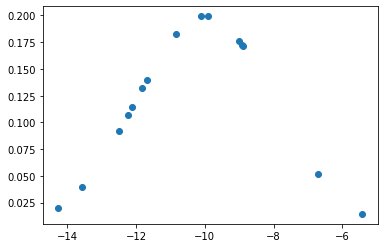

In [104]:
plt.scatter(x,y(x, mu, std))